# Analisis Data Online Retail

## 1. Data Preparation

### 1.1 Import Library

In [25]:
# 1.1 Import Library

import pandas as pd
import matplotlib.pyplot as plt


### 1.2 Load Data file

In [26]:
# 1.2 Load Data file

Df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
Df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 1.3 Check Data Type

In [27]:
# 1.3 Check Data Type

Df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## 2. Data Cleaning

### 2.1 Dimensionality of the DataFrame

In [28]:
# 2.1 Dimensionality of the DataFrame

Df.shape


(541909, 8)

### 2.2 Missing Values

In [29]:
# 2.2 Missing Values

Df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### 2.2.1 Cleaning Missing Value

In [30]:
# 2.2.1 Cleaning Missing Value

Df_Clean = Df.dropna(axis=0, subset=['Description','CustomerID'])


### 2.3 Missing Values

In [31]:
# 2.3 Missing Values

Df_Clean.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 2.3.1 Dimensionality of the DataFrame

In [32]:
# 2.3.1 Dimensionality of the DataFrame

Df_Clean.shape


(406829, 8)

Dari data transaksi online retail. didapat memiliki 541909 baris dan 8 kolom. sebelum melakukan perbersihan data, ditemukan data kosong di kolom Description sebanyak 1454 dan kolom CustomerID sebanyak 135080 dan setelah dilakukan pembersihan baris terjadi pengurangan jumlah baris menjadi 406829 baris dan 8 kolom.

### 2.4 Sales Revenue

In [33]:
# 6.1 Sales Revenue

Df_Clean['Sales'] = Df_Clean['Quantity'] * Df_Clean['UnitPrice']
Df_Clean.head()


C:\Users\62858\AppData\Local\Temp\ipykernel_17500\4154918590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_Clean['Sales'] = Df_Clean['Quantity'] * Df_Clean['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 3. Analisis descriptive

### 3.1 summary descriptive statistics

In [34]:
# 3.1 summary descriptive statistics

Desc = Df_Clean.describe().transpose()
Desc['Type'] = Df_Clean.dtypes
Desc


,count,mean,std,min,25%,50%,75%,max,Type
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0,int64
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0,float64
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0,float64
Sales,406829.0,20.401854,427.591718,-168469.6,4.20,11.10,19.50,168469.6,float64


Dari kesimpulan diatas terdapat nilai minus sebanyak 80995 untuk jumlah transaksi dan jumlah transaksi tertinggi sebesar 80995 

#### 3.1.1 Descriptive Statistics Colums InvoiceDate

In [35]:
# 3.1.1 Descriptive Statistics Colums InvoiceDate

Desc_InvoiceDate = pd.DataFrame(Df_Clean['InvoiceDate'].describe())
Desc_InvoiceDate


C:\Users\62858\AppData\Local\Temp\ipykernel_17500\3938452754.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Desc_InvoiceDate = pd.DataFrame(Df_Clean['InvoiceDate'].describe())


,InvoiceDate
count,406829
unique,20460
top,2011-11-14 15:27:00
freq,543
first,2010-12-01 08:26:00
last,2011-12-09 12:50:00


Diketahui dari Data transaksi online retail yang dimulai dari tanggal 1 Desember 2010 sampai 9 Desember 2011 dengan jumlah transaksi sebanyak 406829. terdapat jumlah transaksi tertinggi dalam satu hari pada tanggal 14 November 2011 sebanyak 543 transaksi.

#### 3.1.2 Descriptive Statistics Colums Description

In [36]:
# 3.1.2 Descriptive Statistics Colums Description

Desc_Description = pd.DataFrame(Df_Clean['Description'].describe())
Desc_Description


,Description
count,406829
unique,3896
top,WHITE HANGING HEART T-LIGHT HOLDER
freq,2070


Diketahui dari data description terdapat 3896 item produk dan didapat bahwa item yang paling banyak dipesan adalah :
- item WHITE HANGING HEART T-LIGHT HOLDER sebanyak 2070

#### 3.1.3 Descriptive Statistics Colums Country

In [37]:
# 3.1.3 Descriptive Statistics Colums Country

pd.DataFrame(Df_Clean['Country'].describe())


,Country
count,406829
unique,37
top,United Kingdom
freq,361878


Diketahui dari kolom negara terdapat 37 Negara dan didapat bahwa negara yang paling banyak melakukan transaksi adalah :
- Unitted Kingdom sebanyak 361878 transaksi

## 4. Quantity Distribution

### 4.1 Box Plot Quantity Distribution

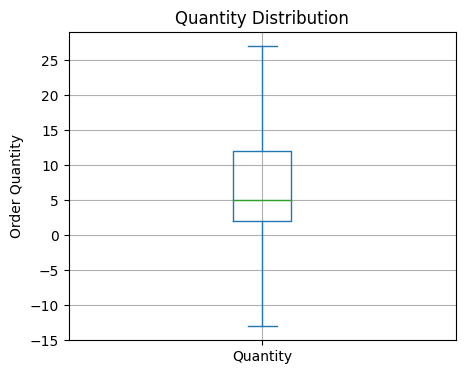

In [38]:
# 4.1 Box Plot Quantity Distribution

Ax = Df_Clean['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(5, 4)
)

Ax.set_ylabel('Order Quantity')
Ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()


Dari grafik diatas dapat disimpulkan bahwa banyaknya transaksi berulang (repeat order) di angka 1 - 12 dan terdapat nilai minus lebih dari 10.

#### 4.1.1 Successful transaction

In [39]:
# 4.1.1 Successful transaction

Df_Berhasil = Df_Clean.loc[Df_Clean['Quantity'] > 0]
display(Df_Berhasil.head())

display(Df_Berhasil.shape)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


(397924, 9)

- Dari jangka waktu selama 375 Hari (2010-12-01 s/d 2011-12-09)
- Untuk transaksi yang berhasil sebanyak 397924.

##### 4.1.1.1 Times Series Number Of Orders

##### A. Monthly transactions

In [40]:
# A. Monthly transactions

Transaksi_perbulan = Df_Berhasil.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
print(Transaksi_perbulan)


InvoiceDate
2010-12-31    1400
2011-01-31     987
2011-02-28     998
2011-03-31    1321
2011-04-30    1149
2011-05-31    1555
2011-06-30    1393
2011-07-31    1331
2011-08-31    1281
2011-09-30    1756
2011-10-31    1929
2011-11-30    2658
2011-12-31     778
Freq: M, Name: InvoiceNo, dtype: int64


##### B. Graphs Monthly transactions

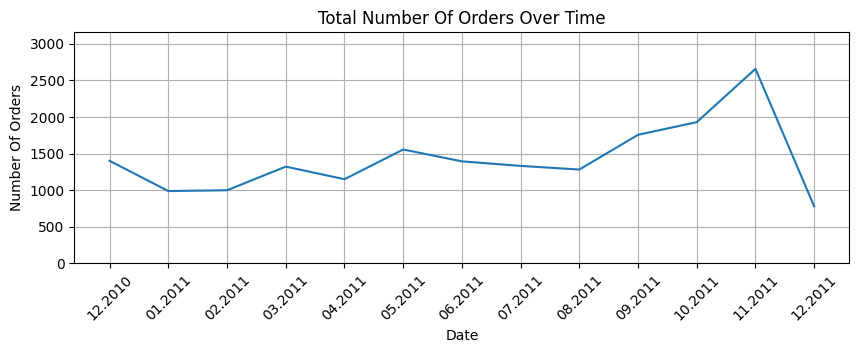

In [41]:
# B. Graphs Monthly transactions

Ax = pd.DataFrame(Transaksi_perbulan.values).plot(
    grid=True,
    figsize=(10,3),
    legend=False
)

Ax.set_xlabel('Date')
Ax.set_ylabel('Number Of Orders')
Ax.set_title('Total Number Of Orders Over Time')

Ax.set_ylim([0, max(Transaksi_perbulan.values)+500])

plt.xticks(
    range(len(Transaksi_perbulan.index)), 
    [x.strftime('%m.%Y') for x in Transaksi_perbulan.index], 
    rotation=45
)

plt.show()


Dari grafik times series diatas menunjukkan adanya penurunan jumlah order pada bulan Desember dikarenakan pada bulan tersebut hanya 9 hari melakukan order.

##### 4.1.1.2 Times Series Revenue

##### A. Monthly Sales Revenue

In [42]:
# A. monthly sales revenue

Pendapatan_perbulan = Df_Berhasil.set_index('InvoiceDate')['Sales'].resample('M').sum()
Pendapatan_perbulan


InvoiceDate
2010-12-31     572713.890
2011-01-31     569445.040
2011-02-28     447137.350
2011-03-31     595500.760
2011-04-30     469200.361
2011-05-31     678594.560
2011-06-30     661213.690
2011-07-31     600091.011
2011-08-31     645343.900
2011-09-30     952838.382
2011-10-31    1039318.790
2011-11-30    1161817.380
2011-12-31     518192.790
Freq: M, Name: Sales, dtype: float64

##### B. Graphs Monthly Sales Revenue

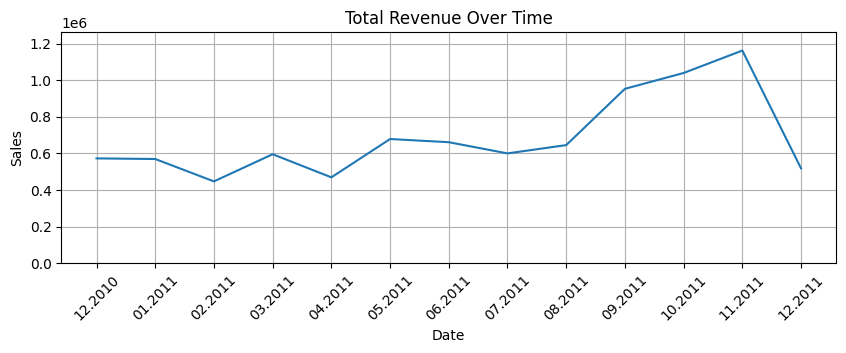

In [43]:
# B. Graphs Monthly Sales Revenue

Ax = pd.DataFrame(Pendapatan_perbulan.values).plot(
    grid=True,
    figsize=(10,3),
    legend=False
)

Ax.set_xlabel('Date')
Ax.set_ylabel('Sales')
Ax.set_title('Total Revenue Over Time')

Ax.set_ylim([0, max(Pendapatan_perbulan.values)+100000])

plt.xticks(
    range(len(Pendapatan_perbulan.index)), 
    [x.strftime('%m.%Y') for x in Pendapatan_perbulan.index], 
    rotation=45
)

plt.show()


##### 4.1.1.3 Times Series Repeat Customers

##### A. Grouping Customer Orders

In [44]:
# A. Grouping Customer Orders

Customers_Invoice = Df_Berhasil.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales' : sum,
    'CustomerID' : max,
    'Country' : max
}).reset_index()

Customers_Invoice.head(10)


,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
5,536370,2010-12-01 08:45:00,855.86,12583.0,France
6,536371,2010-12-01 09:00:00,204.00,13748.0,United Kingdom
7,536372,2010-12-01 09:01:00,22.20,17850.0,United Kingdom
8,536373,2010-12-01 09:02:00,259.86,17850.0,United Kingdom
9,536374,2010-12-01 09:09:00,350.40,15100.0,United Kingdom


##### B. Grouping Repeat Customers

In [45]:
# B. Grouping Repeat Customers

Customers_repeat = Customers_Invoice.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']
Customers_repeat


InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
2011-12-31    106
Freq: M, Name: CustomerID, dtype: int64

##### C.

In [46]:
# C

Customers_unique = Df_Berhasil.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
Customers_unique

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
2011-12-31     615
Freq: M, Name: CustomerID, dtype: int64

##### D. Monthly Persent Customers

In [47]:
# 7.4 Monthly Persent Customers

Persent_repeat = Customers_repeat/Customers_unique*100
Persent_repeat


InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
2011-12-31    17.235772
Freq: M, Name: CustomerID, dtype: float64

#### 4.1.2 Failed transaction

In [48]:
# 4.1.2 Failed transaction

Df_Gagal = Df_Clean.loc[Df_Clean['Quantity'] < 0]
display(Df_Gagal.head())

display(Df_Gagal.shape)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


(8905, 9)

- Dari jangka waktu selama 375 Hari (2010-12-01 s/d 2011-12-09)
- Untuk transaksi yang gagal sebanyak 8905.

##### 4.1.2.1 Times Series Number Of Orders

##### A. Monthly transactions

In [49]:
# A. Monthly transactions

Transaksi_perbulan = Df_Gagal.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
print(Transaksi_perbulan)

InvoiceDate
2010-12-31    308
2011-01-31    249
2011-02-28    204
2011-03-31    298
2011-04-30    235
2011-05-31    294
2011-06-30    314
2011-07-31    262
2011-08-31    263
2011-09-30    322
2011-10-31    334
2011-11-30    428
2011-12-31    143
Freq: M, Name: InvoiceNo, dtype: int64


##### B. Graphs Monthly transactions

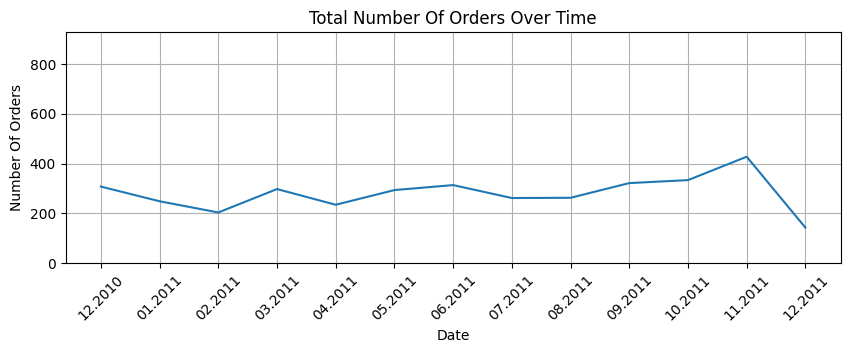

In [52]:
# B. Graphs Monthly transactions

Ax = pd.DataFrame(Transaksi_perbulan.values).plot(
    grid=True,
    figsize=(10,3),
    legend=False
)

Ax.set_xlabel('Date')
Ax.set_ylabel('Number Of Orders')
Ax.set_title('Total Number Of Orders Over Time')

Ax.set_ylim([0, max(Transaksi_perbulan.values)+500])

plt.xticks(
    range(len(Transaksi_perbulan.index)), 
    [x.strftime('%m.%Y') for x in Transaksi_perbulan.index], 
    rotation=45
)

plt.show()


##### 4.1.2.2 Times Series Revenue

##### A. monthly sales revenue

In [53]:
# A. monthly sales revenue

Pendapatan_perbulan = Df_Gagal.set_index('InvoiceDate')['Sales'].resample('M').sum()
Pendapatan_perbulan

InvoiceDate
2010-12-31    -18109.87
2011-01-31    -94370.66
2011-02-28    -10591.20
2011-03-31    -15536.15
2011-04-30    -43152.51
2011-05-31    -30343.48
2011-06-30    -53200.53
2011-07-31    -25852.53
2011-08-31    -28975.90
2011-09-30    -21398.01
2011-10-31    -64715.20
2011-11-30    -29409.64
2011-12-31   -175686.41
Freq: M, Name: Sales, dtype: float64

##### B. Graphs Monthly Sales Revenue

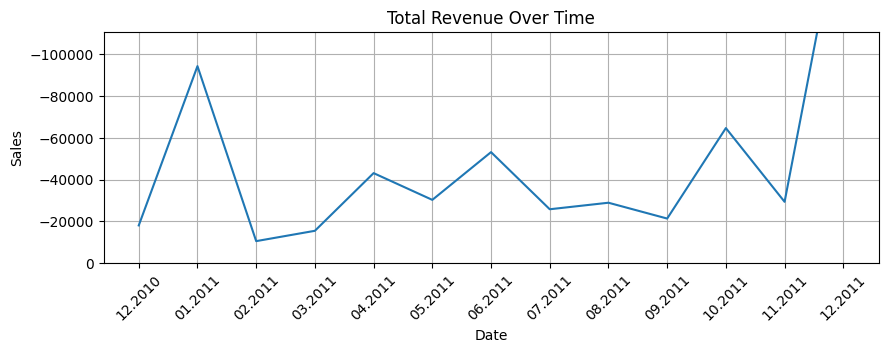

In [55]:
# B. Graphs Monthly Sales Revenue

Ax = pd.DataFrame(Pendapatan_perbulan.values).plot(
    grid=True,
    figsize=(10,3),
    legend=False
)

Ax.set_xlabel('Date')
Ax.set_ylabel('Sales')
Ax.set_title('Total Revenue Over Time')

Ax.set_ylim([0, max(Pendapatan_perbulan.values)-100000])

plt.xticks(
    range(len(Pendapatan_perbulan.index)), 
    [x.strftime('%m.%Y') for x in Pendapatan_perbulan.index], 
    rotation=45
)

plt.show()

##### 4.1.2.3 Times Series Repeat Customers

##### A. Grouping Customer Orders

In [56]:
# A. Grouping Customer Orders

Customers_Invoice = Df_Gagal.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales' : sum,
    'CustomerID' : max,
    'Country' : max
}).reset_index()

Customers_Invoice.head(10)


,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,C536379,2010-12-01 09:41:00,-27.50,14527.0,United Kingdom
1,C536383,2010-12-01 09:49:00,-4.65,15311.0,United Kingdom
2,C536391,2010-12-01 10:24:00,-141.48,17548.0,United Kingdom
3,C536506,2010-12-01 12:38:00,-25.50,17897.0,United Kingdom
4,C536543,2010-12-01 14:30:00,-3.80,17841.0,United Kingdom
5,C536548,2010-12-01 14:33:00,-122.30,12472.0,Germany
6,C536606,2010-12-02 09:10:00,-5.90,14092.0,United Kingdom
7,C536622,2010-12-02 10:37:00,-17.00,12471.0,Germany
8,C536625,2010-12-02 10:46:00,-29.90,14766.0,United Kingdom
9,C536642,2010-12-02 11:56:00,-5.95,14390.0,United Kingdom


##### B. Grouping Repeat Customers

In [57]:
# B. Grouping Repeat Customers

Customers_repeat = Customers_Invoice.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']
Customers_repeat


InvoiceDate
2010-12-31    49
2011-01-31    33
2011-02-28    16
2011-03-31    44
2011-04-30    30
2011-05-31    40
2011-06-30    44
2011-07-31    36
2011-08-31    37
2011-09-30    42
2011-10-31    35
2011-11-30    64
2011-12-31     6
Freq: M, Name: CustomerID, dtype: int64

##### C.

In [ ]:
# C.

Customers_unique = Df_Berhasil.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
Customers_unique

##### D. Monthly Persent Customers

In [58]:
# D. Monthly Persent Customers

Persent_repeat = Customers_repeat/Customers_unique*100
Persent_repeat

InvoiceDate
2010-12-31    5.536723
2011-01-31    4.453441
2011-02-28    2.110818
2011-03-31    4.517454
2011-04-30    3.504673
2011-05-31    3.787879
2011-06-30    4.439960
2011-07-31    3.793467
2011-08-31    3.957219
2011-09-30    3.317536
2011-10-31    2.565982
2011-11-30    3.843844
2011-12-31    0.975610
Freq: M, Name: CustomerID, dtype: float64